# Statistical Simulation in Python

Simulations are a class of computational algorithms that use the relatively simple idea of random sampling to solve increasingly complex problems. Although they have been around for ages, they have gained in popularity recently due to the rise in computational power and have seen applications in multiple domains including Artificial Intelligence, Physics, Computational Biology and Finance just to name a few. Students will use simulations to generate and analyze data over different probability distributions using the important NumPy package. This course will give students hands-on experience with simulations using simple, real-world applications.

## Basics of randomness & simulation
### Introduction to random variables

Simulations are a powerful and practical tool for solving a wide variety of data science problems.
* Basics of randomness & simulation .
* Simulation & probability.
* Bootstrapping and resampling methots.
* Advances application of simulation.

A random variable is a quantity that can take an multiple values based on random choice.

**Continues random variable** When the value can take an infinitely many values, it is called a continious random  variable. such as height or weight. <br>
**Discrete random variable** If the varibale only can take a finite set of values like the roll of six-sided die can have only one of six possible outcomes. It is called discrete random variable. 

### Probability distributions

A probability distribution is a mappping from set of possible outcomes of random variable to the probability of observing that outcomes.

Probability distributions tells you how likely you are to obserbe a given outcomes or set of outcomes. Probability distributions are eithrt random or discerete depending on the type of random variable they represent.

*For continues variables*, the distributions is represented by a probability density function (PDF) an probability is defined over an interval like *normal distribution.*

*For discerete variables*, the distributions is represented by a probability mass function (PMF) and probability can be defined a single point or interval like *bioimal or poisson distrubitions*. 


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Normal Distribution 

**numpy.random.normal(loc=0.0, scale=1.0, size=None)** <br>
**loc :** Mean (“centre”) of the distribution. <br>
**scale :** Standard deviation (spread or “width”) of the distribution.<br>
**size :** int or tuple of ints, optional

Draws a random samples from a normal (Gaussian) distribution.

The probability density function of the normal distribution, first derived by De Moivre and 200 years later by both Gauss and Laplace independently is often called the bell curve because of its characteristic shape. The probability density for the Gaussian distribution is

\begin{equation}
p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{\frac{-(x-\mu^2)}{2 \sigma^2}}
\end{equation}

where $\mu$ is the mean and $\sigma$ the standard deviation. The square of the standard deviation, $\sigma^2$, is called the variance. The function has its peak at the mean, and its “spread” increases with the standard deviation.


In [98]:
# Draw samples from the distribution:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
# Verify the mean and the variance:
print(abs(mu - np.mean(s)),abs(mu - np.mean(s)) < 0.01)
print(abs(sigma - np.std(s, ddof=1)),abs(sigma - np.std(s, ddof=1)) < 0.01)

0.001101936286855954 True
0.0017772465442810192 True


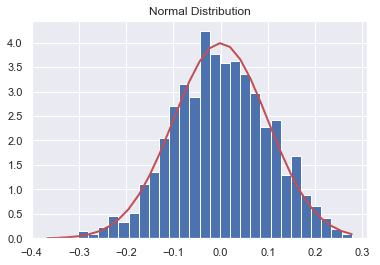

In [99]:
# Display the histogram of the samples, along with the probability density function:
count, bins, ignored =plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.title('Normal Distribution')
plt.show()

### Binomial Distribution
**numpy.random.binomial(n, p, size=None)** <br>
**n :** Parameter of the distribution, >= 0. Floats are also accepted, but they will be truncated to integers.<br>
**p :** Parameter of the distribution, >= 0 and <=1.<br>
**size :** int or tuple of ints, optional<br>
Draw samples from a binomial distribution.
Samples are drawn from a binomial distribution with specified parameters, n trials and p probability of success where n an integer >= 0 and p is in the interval [0,1]. 

The binomial distribution gives the discrete probability distribution $P_p(n|N)$ of obtaining exactly *n* successes out of *N* Bernoulli trials (where the result of each Bernoulli trial is true with probability *p* and false with probability *q=1-p*). The binomial distribution is therefore given by

\begin{equation}
P_p(n|N) = \binom{N}{n} p^n q^{N-n}\\
= \frac{N!}{n!(N-n)!} p^n (1-p)^{N-n}
\end{equation}

where $\binom{N}{n}$ is binomial coefficient whic is the number of ways of picking n unordered outcomes from N possibilities,also known as a combination 

**Bernoulli trials** An experiment in which *s* trials are made of an event, with probability *p* of success in any given trial.

`A real world example. A company drills 9 wild-cat oil exploration wells, each with an estimated probability of success of 0.1. All nine wells fail. What is the probability of that happening?

Let’s do 20,000 trials of the model, and count the number that generate zero positive results.`

In [100]:
binomial = np.random.binomial(9, 0.1, 20000)
print(sum(binomial ==0)/20000)
"""0.384 or 38%"""

0.38605


'0.384 or 38%'

### Poisson  Distribution

**numpy.random.poisson(lam=1.0, size=None)***<br>
**lam :** Expectation of interval, should be >= 0. A sequence of expectation intervals must be broadcastable over the requested size.
**size :** int or tuple of ints, optional
Draw samples from a Poisson distribution which is the limit of the binomial distribution for large N.

Given a Poisson process, the probability of obtaining exactly n successes in N trials is given by the limit of a binomial distribution.

For the poisson distribution:
\begin{equation}
f(k;\lambda) = \frac{\lambda^k e^{-\lambda}}{k!}
\end{equation}

For events with an expected separation $\lambda$ the Poisson distribution f(k; $\lambda$) describes the probability of k events occurring within the observed interval $\lambda$.




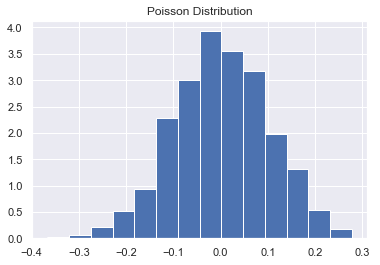

In [101]:
poisson = np.random.poisson(5, 10000)
plt.hist(s, 14, density=True)
plt.title('Poisson Distribution')
plt.show()

We will learn how to draw samples from a probability distribution.In particular, we will draw samples from a very important discrete probability distribution, the Poisson distribution, which is typically used for modeling the average rate at which events occur.

In [102]:
#Initialize seed and parameters
np.random.seed(123)
lam, size_1, size_2 = 5,3,1000
#Using np.random.poisson() draw samples from a Poisson distribution using lam (lambda) and size_1 
sample_1 = np.random.poisson(lam, size_1)
sample_2 = np.random.poisson(lam, size_2)

#calculate the absolute difference between their mean and lambda using np.mean() and abs()
answer_1 = abs(lam - sample_1.mean())
answer_2 = abs(lam - sample_2.mean())
print("|Lambda - sample mean| with {} samples is {} \n|Lambda - sample mean| with {} samples is {}. "
      .format(size_1, answer_1, size_2, answer_2))

|Lambda - sample mean| with 3 samples is 0.33333333333333304 
|Lambda - sample mean| with 1000 samples is 0.07699999999999996. 


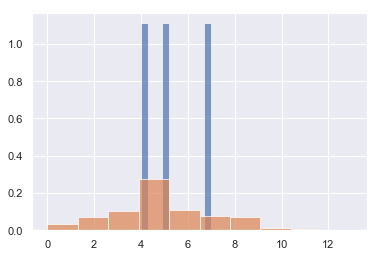

In [103]:
_ = plt.hist(sample_1, density=True, alpha=0.7)
_ = plt.hist(sample_2, density=True, alpha=0.7)
plt.show()

We will learn another useful function - np.random.shuffle(). This function allows you to randomly shuffle a sequence in place. At the end of this exercise, you will know how to shuffle a deck of cards or any sequence of items.

In [104]:
deck_of_card =[('Heart', 0),('Heart', 1),('Heart', 2),('Heart', 3),('Heart', 4),('Heart', 5),('Heart', 6),
 ('Heart', 7),('Heart', 8),('Heart', 9),('Heart', 10),('Heart', 11),('Heart', 12),('Club', 0),('Club', 1), 
 ('Club', 2),('Club', 3),('Club', 4),('Club', 5),('Club', 6),('Club', 7), ('Club', 8),('Club', 9),('Club', 10),
 ('Club', 11), ('Club', 12),('Spade', 0),('Spade', 1),('Spade', 2),('Spade', 3), ('Spade', 4), ('Spade', 5),
 ('Spade', 6),('Spade', 7),('Spade', 8),('Spade', 9),('Spade', 10),('Spade', 11),('Spade', 12),('Diamond', 0),
 ('Diamond', 1), ('Diamond', 2),('Diamond', 3),('Diamond', 4),('Diamond', 5), ('Diamond', 6), ('Diamond', 7),
 ('Diamond', 8), ('Diamond', 9), ('Diamond', 10),('Diamond', 11),('Diamond', 12)]

In [105]:
np.random.shuffle(deck_of_card)
print(deck_of_card[0:3])

[('Spade', 11), ('Heart', 10), ('Diamond', 1)]


### Simulation Basic

Simulations is a frame work that allows us to model real=worl systems and processes. Simulations is typically chracterized by repeated randon sampling which means that we use the power of random variable to generate multiple outcomes . Simulations gives us approximate solutions. 

Simulatons steps.<br>
    *1- Define the set of outcomes associated with a random variable.<br>
    2- Assign a probability to each of these outcomes- the probability sitribitions.<br>
    3- Define the relationship betweeen multiple random variables..<br>
    4- Draw samples from the probability distributions..<br>
    5- Anlyze the sample outcomes..<br>*

For pactice, we will run a siple dice game. The dice game involves throwing two dice and winning if they show the same number. For the step 1&2 we first define the outcomes of the die and assing the probability to each outcomes.Since we have a fair dice, we can use the identical distrubitons so, it becomes uniform distributions. in step 3, we denine the relationship between the dice. if they shoe the same number we win, otherwise we lost. Step 1,2&3 gies us the statistical model underliying the simulation. -describing the model. We generate multiple outcomes though repeated random sampling.And then analyze the outcomes.

In [106]:
# Define die outcomes and probabilities
#Construct a six-sided die as a list of each of the possible outcomes and assign it to the variable die
#Define the probability of each of the six sides having an equal chance of showing up 
die, probabilities, throws = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 1

# Use np.random.choice to throw the die once and record the outcome
outcome = np.random.choice(die, size=throws, p=probabilities)
print("Outcome of the throw: {}".format(outcome[0]))

Outcome of the throw: 1


**Throwing two fair dice**

In [107]:
# Initialize model parameters & simulate dice throw
die_t, probabilities_t, num_of_dice = [1,2,3,4,5,6], [ 1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
outcomes = np.random.choice(die, size=2, p=probabilities_t)
if outcomes[0] == outcomes[1]:
    answer = 'win'
else:
    answer = 'lose'
print("The dice show {} and {}. You {}!".format(outcomes[0], outcomes[1], answer))


The dice show 4 and 3. You lose!


**Simulating the dice game**
We now know how to implement the first three steps of a simulation. Now let's consider the next step - repeated random sampling.

Simulating an outcome once doesn't tell us much about how often we can expect to see that outcome. In the case of the dice game from the previous exercise, it's great that we won once. But suppose we want to see how many times we can expect to win if we played this game multiple times, we need to repeat the random sampling process many times. Repeating the process of random sampling is helpful to understand and visualize inherent uncertainty and deciding next steps.

In [108]:
## Initialize model parameters & simulate dice throw
die_s, probabilities_s , num_of_dice_s = [1,2,3,4,5,6], [ 1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
#sims variable how many times we want to simulate and wins varibale to count how many times we win.
sims, wins = 100, 0

#write a loop for simulations
for i in range(sims):
    outcomes_s = np.random.choice(die, size=2, p=probabilities)
    ## Increment `wins` by 1 if the dice show same number
    if outcomes_s[0] == outcomes_s[1]:
        wins = wins +1
print("In {} games, you win {} times".format(sims, wins))


In 100 games, you win 21 times


## Using simulation for decision-making

We will run a complete simulation, take a decision based on our observed outcomes, and learn to modify inputs to the simulation model.

We will use simulations to figure out whether or not we want to buy a lottery ticket. Suppose you have the opportunity to buy a lottery ticket which gives you a shot at a grand prize of $1 Million. Since there are 1000 tickets in total, your probability of winning is 1 in 1000. Each ticket costs $10. Let's use our understanding of basic simulations to first simulate one drawing of the lottery.

In [109]:
# Pre-defined constant variables
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 1000000

# Probability of winning: Remember that 1 out of the total number of lottery tickets sold will win.
chance_of_winning = 1/1000

# Simulate a single drawing of the lottery
gains = [-lottery_ticket_cost, grand_prize-lottery_ticket_cost]
probability = [1 - chance_of_winning, chance_of_winning]
outcome = np.random.choice(a=gains, size=1, p=probability, replace=True)

print("Outcome of one drawing of the lottery is {}".format(outcome))

Outcome of one drawing of the lottery is [-10]


We complete the simulation process by repeating the process multiple times.Repeating the process gives us multiple outcomes. We can think of this as multiple universes where the same lottery drawing occurred. We can then determine the average winnings across all these universes. If the average winnings are greater than what we pay for the ticket then it makes sense to buy it, otherwise, we might not want to buy the ticket.This is typically how simulations are used for evaluating business investments. 

In [110]:
# Initialize size and simulate outcome
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 1000000
chance_of_winning = 1/num_tickets
size = 2000
#Set payoffs equal to a list containing how much you could lose and how much you could win
payoffs = [-lottery_ticket_cost, grand_prize]
#Set probs equal to a list of probabilities of losing and winning.
probs = [1 - chance_of_winning, chance_of_winning]

outcomes = np.random.choice(a=payoffs, size=size, p=probs, replace=True)

# Mean of outcomes.
answer = np.mean(outcomes)
print("Average payoff from {} simulations = {}".format(size, answer))

Average payoff from 2000 simulations = 490.005


we might want to know how expensive the ticket needs to be for it to not make sense to buy it. To understand this, we need to modify the ticket cost to see when the expected payoff is negative.

In [111]:
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 1000000
chance_of_winning = 1/num_tickets

# Initialize simulations and cost of ticket
sims, lottery_ticket_cost = 3000, 0

# Use a while loop to increment `lottery_ticket_cost` till average value of outcomes falls below zero
while 1:
    outcomes = np.random.choice([-lottery_ticket_cost, grand_prize-lottery_ticket_cost],
                 size=sims, p=[1-chance_of_winning, chance_of_winning], replace=True)
    if outcomes.mean() < 0:
        break
    else:
        lottery_ticket_cost += 1
answer = lottery_ticket_cost - 1

print("The highest price at which it makes sense to buy the ticket is {}".format(answer))

The highest price at which it makes sense to buy the ticket is 12


## Probability and Data genaration Process 

Sample Space is a set of full possible outcomes.

**Probablity** is a numbers that help us the understanad the likelihood of accurance of an event within that sample space. There is general agreement that a probability is a real value between 0 and 1.

The “things” we assign probabilities to are called *events*. If E represents an event, then P(E) represents the probability that E will occur. A situation where E might or might not happen is called a *trial*.

If two events are mutually exclusive, that means that only one of them can happen, so the conditional probabilities are 0:<br>
$P(A|B) = P(B|A) = 0$

In this case it is easy to compute the probability of either event:<br>
$P(A or B) = P(A) + P(B)$ Warning: not always true.

But remember that this only applies if the events are mutually exclusive. Ingeneral the probability of A or B or both is:<br>
$P(A or B) = P(A) + P(B) - P(A and B)$ <br>
The reason we have to subtract off 4P(A and B)4 is that otherwise it gets counted twice.

**Example** <br>
*We will use the generalized probability formula P(A∪B)=P(A)+P(B)−P(A∩B) to calculate the probability of two events. Consider a deck of cards (13 cards x 4 suites = 52 cards in total). One card is drawn at random. What is the probability of getting a queen or a spade? Here event A is the card being a queen and event B is the card being a spade. Think carefully about whether the two events have anything in common.*

Solution: P(A∪B)=P(A)+P(B)−P(A∩B) 

$P(A) = 4/52 $ probability of being queen->Because we have 4 queen in all cards coming from each suites<br>
$P(B) = 13/52 $probability of being spade -> we have 13 spade cards in total 52.<br>
$P(A∩B) 1/52$ probabiliy of being queen and spade<br>

$ P(A∪B)=P(A)+P(B)−P(A∩B) $ <br>
$P(A∪B) = \frac{4}{52} + \frac{13}{52} - \frac{1}{52} $<br>
$P(A∪B) = \frac{16}{52}$<br>